In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from datetime import date
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns

# PM4Py library
#!pip install pm4py --user
from pm4py.objects.conversion.log import converter as log_converter
# from pm4py.objects.log.importer.xes import importer as xes_importer

# process mining 
# from pm4py.algo.discovery.alpha import algorithm as alpha_miner
# from pm4py.algo.discovery.inductive import algorithm as inductive_miner
# from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.algo.discovery.footprints import algorithm as footprints_discovery


# viz
# from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.footprints import visualizer as fp_visualizer
# from pm4py.visualization.transition_system import visualizer as ts_visualizer
# from pm4py.visualization.process_tree import visualizer as pt_visualizer
# from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc 
# from pm4py.objects.petri_net.utils import reachability_graph
# from pm4py.objects.conversion.process_tree import converter as pt_converter

import pm4py

In [10]:
# Preparing the data
events = pd.read_csv('interval_event_log_with_artificial_resources.csv')
events['starttime'] = pd.to_datetime(events['starttime'])
events['endtime'] = pd.to_datetime(events['endtime'])
events.rename(columns={'endtime': 'time:timestamp', 'starttime': 'start_timestamp', 'orderID': 'case:concept:name', 'activity': 'concept:name', 'resource': 'org:resource'}, inplace=True)

## Convert to log format
log = log_converter.apply(events)

In [11]:
log

[{'attributes': {'concept:name': 'C1'}, 'events': [{'concept:name': 'place order', 'time:timestamp': Timestamp('2015-01-05 09:02:50+0000', tz='UTC'), 'start_timestamp': Timestamp('2015-01-05 09:00:07+0000', tz='UTC'), 'org:resource': 'HLJOP'}, '..', {'concept:name': 'confirm payment', 'time:timestamp': Timestamp('2015-01-22 12:35:56+0000', tz='UTC'), 'start_timestamp': Timestamp('2015-01-22 12:31:22+0000', tz='UTC'), 'org:resource': 'ZBEXO'}]}, '....', {'attributes': {'concept:name': 'C1266'}, 'events': [{'concept:name': 'place order', 'time:timestamp': Timestamp('2015-08-26 14:04:01+0000', tz='UTC'), 'start_timestamp': Timestamp('2015-08-26 11:58:01+0000', tz='UTC'), 'org:resource': 'VXRUO'}, '..', {'concept:name': 'confirm payment', 'time:timestamp': Timestamp('2015-09-14 10:59:10+0000', tz='UTC'), 'start_timestamp': Timestamp('2015-09-14 10:56:17+0000', tz='UTC'), 'org:resource': 'EXXRY'}]}]

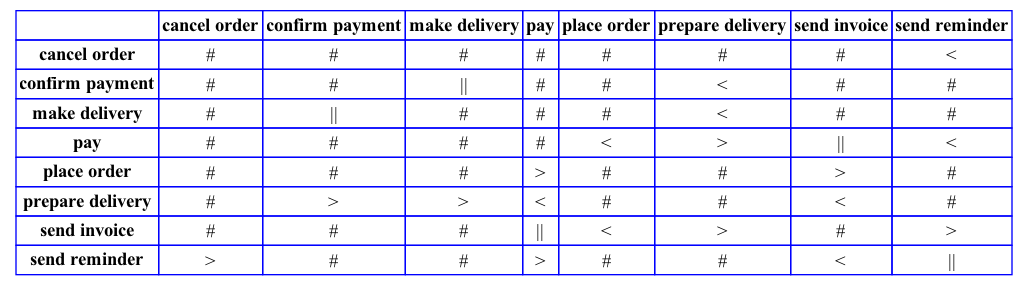

In [12]:
# Exercise 3: Footprints
fp_log = footprints_discovery.apply(log, variant=footprints_discovery.Variants.ENTIRE_EVENT_LOG)
gviz = fp_visualizer.apply(fp_log)
fp_visualizer.view(gviz)

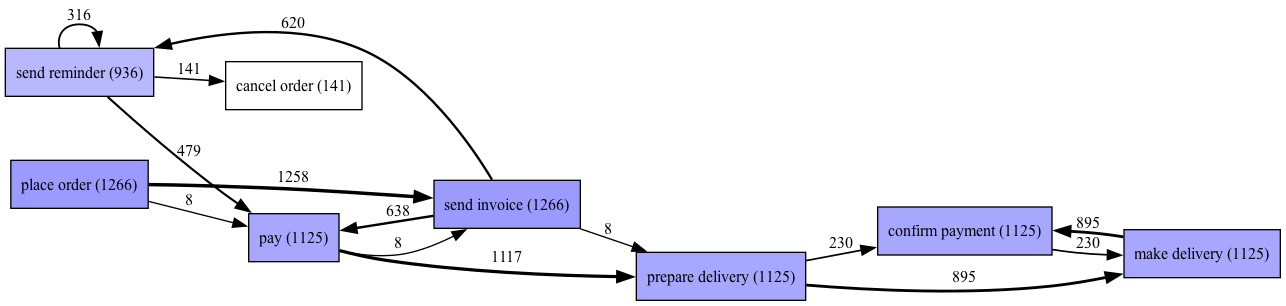

In [13]:
# Exercise 4: Directly-Follows Graph
dfg = dfg_discovery.apply(log)

# Visualize the Directly-Follows Graph
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)